<a href="https://colab.research.google.com/github/GildasTaliah/Solutions_with_PyNoteBook/blob/main/Autom_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PYTHON AUTOMATION**

Python autmation refers to the process mechanising repetive or tedious tasks using the Python programmning language. It involves writing code that can perform specific task or workflows without manual intervention, thereby improving efficiency, productivity and consistency.

Automation can be used for so many areas including, file management, web scraping, data (prep-)processing and analysis, system monitoring and more.



Python automation can be applied to a wide range of task, including:
- **Web scraping**: The data extraction process of collecting data from websites can be fully automated, furthermore monitoring websites for changes can also be implemented with Python automation. Python tools: **requests, BeatifulSoup, scrapy, selenium**
- **File Management**: Repetive task such as reading from and writing unto files can be completely and easily automated. Additionally renaming, moving deletion of files of similar characteristics can be mechanised. Python tools: **os, shutils, pathlib, glob**  
- **API Interaction**: Interactions with (Application Programming Interface) **API** such as data retrieval or fetching data can be carried out in Python, additionaly automatically generating reports can be derived from the fetched data. Also, dedicated signals or notification sending pertaining to unique or strange occurracnce can be mechanised. Python tools: **requests, httpx**
- **System Administration**: Repetitive system or IT-related tasks such as server management, backups, software installations or updates, monitoring can automatically scheduled. Python tools: **schedule, subprocess, psutil**
- **Testing**: Unit testing is the process of testing a code to ensure it works as expected. Functions and codes are written often, but testing each function could be tiresome. Writing a test can be programmed to be perfromed automatically. Python tools: **pytest, unittest**

1. **Web Scraping**: Below we present a simple script that scrapes and extract article titles from a given webpage.  

In [62]:
import requests
from bs4 import BeautifulSoup

# define function to extrac article title

def extract_article_titles(url)-> list:

  """
  Function to extract article titles from a webpage.

  - Input: url of page to scrape
  - Output: list of article titles
  """

  try:
    response = requests.get(url)           #  Fetch content of URL
    response.raise_for_status()            #  Raise error if http request fails

  except requests.RequestException as e:
    print(f"Error fetching URL: {e}")      #  Print error message if request fails
    return []


  # Parse the htmml conten
  soup = BeautifulSoup(response.text, 'html.parser')

  # Extract article titles
  titles = []
  for header in soup.find_all(['h1', 'h2', 'h3', 'h4']):
    # h1: Main Title h2: Subtitle h3: Section Header h4: Sub-section

    title = header.text.strip()
    if title:
      titles.append(title)                 # Only append non-empty list

  return titles

In [63]:
# exmaple use case
url = "https://en.wikipedia.org/wiki/Mathematical_finance"
titles = extract_article_titles(url)
print(titles)

['Contents', 'Mathematical finance', 'History: Q versus P', 'Derivatives pricing: the Q world', 'Risk and portfolio management: the P world', 'Criticism', 'See also', 'Mathematical tools', 'Derivatives pricing', 'Portfolio modelling', 'Other', 'Notes', 'Further reading']


In [64]:
join_data = ' '.join(titles)
print(join_data)

sep_data = ''.join(titles)
print(sep_data)

splitted = sep_data.split()
print(splitted)

Contents Mathematical finance History: Q versus P Derivatives pricing: the Q world Risk and portfolio management: the P world Criticism See also Mathematical tools Derivatives pricing Portfolio modelling Other Notes Further reading
ContentsMathematical financeHistory: Q versus PDerivatives pricing: the Q worldRisk and portfolio management: the P worldCriticismSee alsoMathematical toolsDerivatives pricingPortfolio modellingOtherNotesFurther reading
['ContentsMathematical', 'financeHistory:', 'Q', 'versus', 'PDerivatives', 'pricing:', 'the', 'Q', 'worldRisk', 'and', 'portfolio', 'management:', 'the', 'P', 'worldCriticismSee', 'alsoMathematical', 'toolsDerivatives', 'pricingPortfolio', 'modellingOtherNotesFurther', 'reading']


In [65]:
import pandas as pd
pd.DataFrame(titles)

,0
0,Contents
1,Mathematical finance
2,History: Q versus P
3,Derivatives pricing: the Q world
4,Risk and portfolio management: the P world
5,Criticism
6,See also
7,Mathematical tools
8,Derivatives pricing
9,Portfolio modelling


In [113]:
# exmaple use case
url = "https://finance.yahoo.com/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29\
vZ2xlLmNvbS8&guce_referrer_sig=AQAAADSVL2D5VNt6QShWMo02gCX2KcFiVzftKXcJnhMK8Peil\
1SyBODduHe6vWL_NAQJ42mvofyFiIF9jR1kwTXdNrsdUSMfJYh8aYKl_nF6hYjqzKf7zqfeCVffMHsXEq8hDHEX7u_-W10FvPFBJX4Y_r3y3Bx-L1CKcrKF7yY6v1BE/"
titles = extract_article_titles(url)
print(list(titles)[:20])

['News', 'Life', 'Entertainment', 'Finance', 'Sports', 'New on Yahoo', 'Yahoo Finance', 'Stocks sink as post-election rally fades, Fed spurs rate-cut rethink', 'Nvidia to report Q3 earnings as AI fever powers Wall Street', "The public (and messy) race to become Trump's Treasury secretary", "Newman: Republicans will regret Elon Musk's efficiency project", "McDonald's spends $100M to lure customers after E. coli outbreak", 'Treasury yield surge draws buyers after 10-year tops 4.5%', 'Gold faces worst week since 2021', "Fed's Barkin tells YF: 'I am still seeing progress' on inflation", "Fed's Goolsbee sees another 125 bps of rate cuts by end of 2025", 'SpaceX preparing to launch tender offer at $135/share: FT', 'Latest', 'ICE Delays Changes on Uncertainty Over EU Deforestation Plan', 'Trucking Association of New York blasts revived NYC traffic tolls plan']


In [67]:
pd.DataFrame(titles)

,0
0,News
1,Life
2,Entertainment
3,Finance
4,Sports
...,...
75,"Analyst Report: PayPal Holdings, Inc."
76,Meet the Little-Known Company Yielding 11% Tha...
77,"Kraft Heinz must face Mac & Cheese lawsuit, ju..."
78,US Stocks Erase More Than Half Post-Election G...


In [115]:
all_headlines = ' '.join(titles)
print(len(all_headlines))
all_headlines = all_headlines.lower()
print(all_headlines[:20])

4057
news life entertainment finance sports new on yahoo yahoo finance stocks sink as post-election rally fades, fed spurs rate-cut rethink nvidia to report q3 earnings as ai fever powers wall street the public (and messy) race to become trump's treasury secretary newman: republicans will regret elon musk's efficiency project mcdonald's spends $100m to lure customers after e. coli outbreak treasury yield surge draws buyers after 10-year tops 4.5% gold faces worst week since 2021 fed's barkin tells yf: 'i am still seeing progress' on inflation fed's goolsbee sees another 125 bps of rate cuts by end of 2025 spacex preparing to launch tender offer at $135/share: ft latest ice delays changes on uncertainty over eu deforestation plan trucking association of new york blasts revived nyc traffic tolls plan president of kentucky plant that exploded says it is 'accountable' for neighborhood damages wall street’s post-election market euphoria is cooling down intrum files for bankruptcy in us to r

In [118]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize, word_tokenize

# tokenize words
all_headlines_w = word_tokenize(all_headlines)
print(all_headlines_w[:1000])

['news', 'life', 'entertainment', 'finance', 'sports', 'new', 'on', 'yahoo', 'yahoo', 'finance', 'stocks', 'sink', 'as', 'post-election', 'rally', 'fades', ',', 'fed', 'spurs', 'rate-cut', 'rethink', 'nvidia', 'to', 'report', 'q3', 'earnings', 'as', 'ai', 'fever', 'powers', 'wall', 'street', 'the', 'public', '(', 'and', 'messy', ')', 'race', 'to', 'become', 'trump', "'s", 'treasury', 'secretary', 'newman', ':', 'republicans', 'will', 'regret', 'elon', 'musk', "'s", 'efficiency', 'project', 'mcdonald', "'s", 'spends', '$', '100m', 'to', 'lure', 'customers', 'after', 'e.', 'coli', 'outbreak', 'treasury', 'yield', 'surge', 'draws', 'buyers', 'after', '10-year', 'tops', '4.5', '%', 'gold', 'faces', 'worst', 'week', 'since', '2021', 'fed', "'s", 'barkin', 'tells', 'yf', ':', "'", 'i', 'am', 'still', 'seeing', 'progress', "'", 'on', 'inflation', 'fed', "'s", 'goolsbee', 'sees', 'another', '125', 'bps', 'of', 'rate', 'cuts', 'by', 'end', 'of', '2025', 'spacex', 'preparing', 'to', 'launch', 't

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Let us see this words in a word cloud

In [119]:
# import packages necessary for word cloud
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [120]:
from wordcloud import STOPWORDS

my_stopwords = set(STOPWORDS)
print(list(my_stopwords)[0:10])

my_stopwords.update(['new', 'far', 'blunt', 'daily', 'say'])

['some', 'could', 'each', 'from', 'www', 'my', "you've", 'themselves', 'when', 'com']


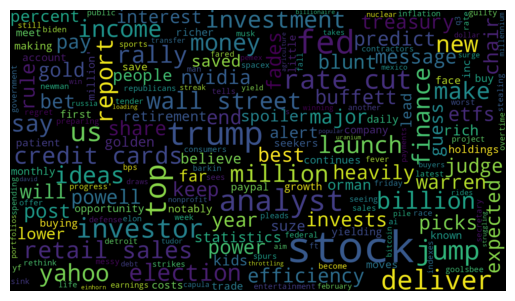

In [121]:
# plot
wwordcloud = WordCloud( width= 1500, height= 850, random_state= 75, stopwords= my_stopwords, max_font_size= 130).generate(all_headlines)
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

<Axes: xlabel='Word'>

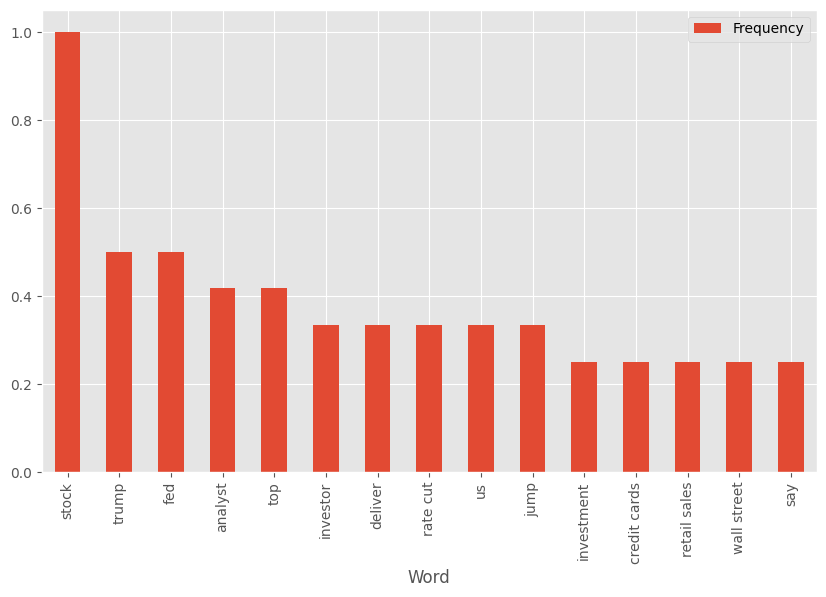

In [122]:
# extract word frequencies from the WordCloud
word_freq = pd.DataFrame(
    wordcloud.words_.items(),
    columns=['Word', 'Frequency']
).sort_values(by='Frequency', ascending=False)
word_freq.head(15).plot(x='Word', y='Frequency', kind='bar', figsize=(10, 6))

We see the most popular words from the headlines, with the first three most popular words been stocks, Trump and FED.
Date of news (Todays date): Friday 15 November 2024.

In the second task under web scraping we use pandas html read function to scrape through and obtain list of tickers for an index

In [71]:
# function to obtain list of tickers

def get_tickers(url: str, table_num: int)-> list:

  """
  Function to return list of tickers for an index

  - Input:
    - url for the page containing the table.
    - The number of the table to scrape
  - Output: list of tickers
  """

  ticker_table = pd.read_html(url, header= 0)[table_num]
  ticker_list = []

  # read for for when its tciker or symbols as column names
  if 'Symbol' in ticker_table.columns:
    ticker_list = ticker_table['Symbol'].tolist()
  elif 'Ticker' in ticker_table.columns:
    ticker_list = ticker_table['Ticker'].tolist()
  else:
    print("No ticker or symbol column found")

  return ticker_list

In [72]:
# DJIA tickers

# URL of the Wikipedia page containing the list of DJIA 30 companies
url = 'https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average'

table_num = 2

tickers = get_tickers(url,  table_num)
pd.DataFrame(tickers).T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,MMM,AXP,AMGN,AMZN,AAPL,BA,CAT,CVX,CSCO,KO,...,NKE,NVDA,PG,CRM,SHW,TRV,UNH,VZ,V,WMT


In [73]:
# DAX tickers

# URL of the Wikipedia page containing the list of DAX 40 companies
url = 'https://en.wikipedia.org/wiki/DAX'
table_num = 4

tickers = get_tickers(url,  table_num)
pd.DataFrame(tickers).T

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,ADS.DE,AIR.PA,ALV.DE,BAS.DE,BAYN.DE,BEI.DE,BMW.DE,BNR.DE,CBK.DE,CON.DE,...,RWE.DE,SAP.DE,SRT3.DE,SIE.DE,ENR.DE,SHL.DE,SY1.DE,VOW3.DE,VNA.DE,ZAL.DE


In [74]:
# S and P Tickers

# URL of the Wikipedia page containing the list of 500 companies
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
table_num = 0

tickers = get_tickers(url,  table_num)
pd.DataFrame(tickers).T

,0,1,2,3,4,5,6,7,8,9,...,493,494,495,496,497,498,499,500,501,502
0,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WY,WMB,WTW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS


In [ ]:
# The End!!!